In [2]:
import xarray as xr
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import cartopy.feature as cfeature

In [12]:
# using MERRA-2 data

data = Dataset('wind4.nc4',  mode='r')
# data = xr.open_dataset('wind2.nc4')

In [13]:
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    History: Original file generated: Thu Mar 12 04:35:15 2015 GMT
    Comment: GMAO filename: d5124_m2_jan10.tavg1_2d_slv_Nx.20150101.nc4
    Filename: MERRA2_400.tavg1_2d_slv_Nx.20150101.nc4
    Conventions: CF-1
    Institution: NASA Global Modeling and Assimilation Office
    References: http://gmao.gsfc.nasa.gov
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: 5.12.4
    TemporalRange: 1980-01-01 -> 2016-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: M2T1NXSLV
    GranuleID: MERRA2_400.tavg1_2d_slv_Nx.20150101.nc4
    ProductionDateTime: Original file generated: Thu Mar 12 04:35:15 2015 GMT
    LongName: MERRA2 tavg1_2d_slv_Nx: 2d,1-Hourly,Time-Averaged,Single-Level,Assimilation,Single-Level Diagnostics
    Title: MERRA2 tavg1_2d_slv_Nx: 2d,1-Hourly,Time-Averaged,Single-Level,Assimilation,Single-Level Diagnostics
    SouthernmostLatitude: -90.0


In [11]:
# Select longitude and latitude data
# lons = data['lon'].values
# lats = data['lat'].values

# Define the extent for California
# california_extent = [-124.3, -114.8, 32.30, 42]

# Filter longitude and latitude data for California
# california_lons = lons[(lons >= california_extent[0]) & (lons <= california_extent[1])]
# california_lats = lats[(lats >= california_extent[2]) & (lats <= california_extent[3])]

# Create meshgrid for California
# lon, lat = np.meshgrid(california_lons, california_lats)

In [14]:
# longitude and latitude
lons = data.variables['lon']
lats = data.variables['lat']
lon, lat = np.meshgrid(lons, lats)
# 10-meter eastward wind m/s
U10M = data.variables['U10M']
# 10-meter northward wind m/s
V10M = data.variables['V10M']

In [15]:
U10M_nans = U10M[:]
V10M_nans = V10M[:]
_FillValueU10M = U10M._FillValue
_FillValueV10M = V10M._FillValue
U10M_nans[U10M_nans == _FillValueU10M] = np.nan
V10M_nans[V10M_nans == _FillValueV10M] = np.nan

In [23]:
ws = np.sqrt(U10M_nans**2+V10M_nans**2)

In [24]:
ws_direction = np.arctan2(V10M_nans,U10M_nans)

In [25]:
ws_daily_avg = np.nanmean(ws, axis=0)

In [27]:
U10M_daily_avg = np.nanmean(U10M_nans, axis=0)
V10M_daily_avg = np.nanmean(V10M_nans, axis=0)
ws_daily_avg_direction = np.arctan2(V10M_daily_avg, U10M_daily_avg)

In [29]:
fig.savefig('MERRA2_10m_ws.png', format='png', dpi=120)

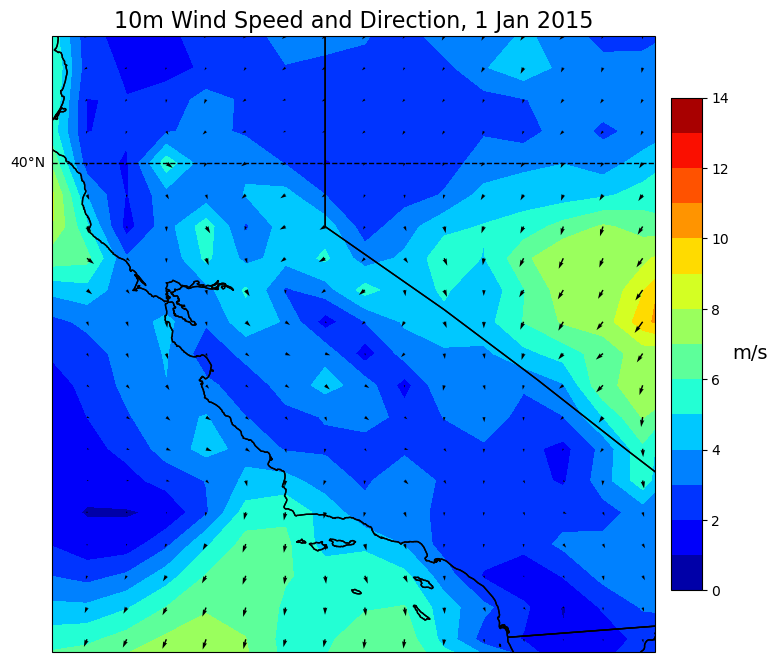

In [34]:
extent = [-124.3, -114.8, 32.30, 42]
# Set the figure size, projection, and extent
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent, crs=ccrs.PlateCarree())  

# Add state borders to the plot
ax.add_feature(cfeature.STATES.with_scale('10m'))
ax.coastlines('10m', edgecolor='black')
ax.add_feature(cfeature.BORDERS.with_scale('10m'))

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-65,-60,-50,-40,-30])
gl.ylocator = mticker.FixedLocator([30,40,50,60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':10, 'color':'black'}
gl.ylabel_style = {'size':10, 'color':'black'}

# Plot windspeed
clevs = np.arange(0,14.5,1)
plt.contourf(lon, lat, ws[0,:,:], clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('10m Wind Speed and Direction, 1 Jan 2015', size=16)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=14,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)
# Overlay wind vectors
qv = plt.quiver(lon, lat, U10M_nans[0,:,:], V10M_nans[0,:,:], scale=420, color='k')